In [41]:
#Importation of libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix 

In [42]:
df = pd.read_csv('Prostate_Cancer.csv')

In [43]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [45]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [46]:
#Mapping of results column

df['diagnosis_result'] = df['diagnosis_result'].apply({'M':1, 'B':0}.get)

In [47]:
#Dropping id column

df.drop(columns='id', inplace=True)

In [48]:
#Define our features (X) and labels (Y)
#Define the test and train dataset for features and labels

x= df.drop(columns='diagnosis_result').copy()
y= df['diagnosis_result']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [49]:
#KNN Classifier
k_score = np.zeros(50)
for k in range(1,50):
    knn= neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    k_score[k-1] = knn.score(x_test,y_test)

#Getting best K in neighbors
k_best = np.argmax(k_score)
k_best

2

In [50]:
#KNN Prediction and Confucion matrix
y_predict = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_predict)
conf_mat

array([[ 4,  0],
       [ 5, 16]], dtype=int64)

In [51]:
#KNN Accuracy

accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8

In [52]:
#RNN Classifier

r_score = np.zeros(50)
R = np.linspace(0.05,0.8,50)
for i in range(len(R)):
    rnn = neighbors.RadiusNeighborsClassifier(radius=R[i], outlier_label='most_frequent')
    rnn.fit(x_train,y_train)
    r_score[i] = rnn.score(x_test,y_test)

#Getting best R in neighbors
r_best = np.argmax(r_score)
r_best

0

In [53]:
#RNN Prediction and Confusion matrix
y_predict_R = rnn.predict(x_test)
conf_mat_R = confusion_matrix(y_test,y_predict_R)
conf_mat_R

array([[ 0,  4],
       [ 0, 21]], dtype=int64)

In [54]:
#RNN Accuracy

accuracy=accuracy_score(y_test,y_predict_R)
accuracy

0.84

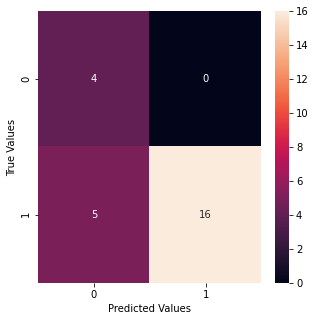

In [55]:
#Heatmap of KNN Classification
plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot = True)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

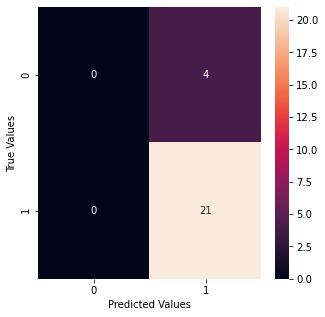

In [56]:
#Heatmap of RNN Classification
plt.figure(figsize=(5,5))
sns.heatmap(conf_mat_R, annot = True)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()